# Convolution and Pooling

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()
training_images = training_images / 255
test_images = test_images / 255

In [7]:
model = tf.keras.models.Sequential([
    
    # Add convolution and max pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print()
print('Model training:')
model.fit(
    training_images,
    training_labels,
    epochs=5
)
print()

print('Model evaluation:')
test_loss = model.evaluate(test_images, test_labels)
print()

print('Output of evaluate')
print(test_loss)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

## Visualize Convolution and Pooling

layer_outputs
KerasTensor(type_spec=TensorSpec(shape=(None, 26, 26, 32), dtype=tf.float32, name=None), name='conv2d_4/Relu:0', description="created by layer 'conv2d_4'")
KerasTensor(type_spec=TensorSpec(shape=(None, 13, 13, 32), dtype=tf.float32, name=None), name='max_pooling2d_4/MaxPool:0', description="created by layer 'max_pooling2d_4'")
KerasTensor(type_spec=TensorSpec(shape=(None, 11, 11, 32), dtype=tf.float32, name=None), name='conv2d_5/Relu:0', description="created by layer 'conv2d_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 32), dtype=tf.float32, name=None), name='max_pooling2d_5/MaxPool:0', description="created by layer 'max_pooling2d_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 800), dtype=tf.float32, name=None), name='flatten_1/Reshape:0', description="created by layer 'flatten_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='dense_2/Relu:0', description="created by layer 'dense_2'")
KerasTensor(type_spec=TensorS

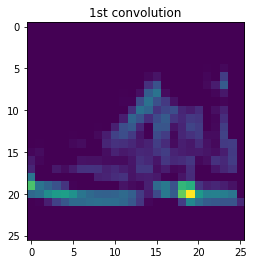

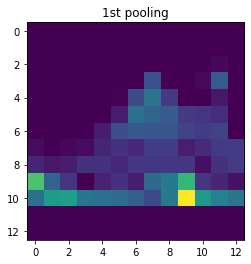

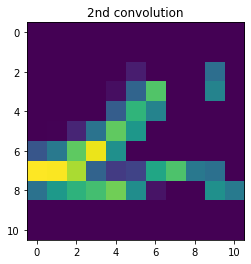

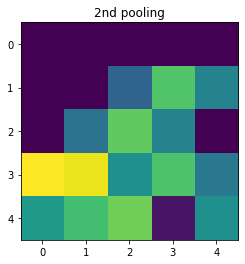

In [23]:
idx = 0
convolution_number = 0

# layer_outputs is a list of layer objects
layer_outputs = [layer.output for layer in model.layers]

print('layer_outputs')
for layer in layer_outputs:
    print(layer)

# This model can output a list of each layer output
activation_model = tf.keras.models.Model(
    inputs=model.input,
    outputs=layer_outputs
)

# Get output of each layer
test_image = test_images[idx]
test_image = test_image.reshape(1, 28, 28, 1)
pred = activation_model.predict(test_image)

print()
print(f'type(pred): {type(pred)}')
print(f'type(pred[0]): {type(pred[0])}')
print()

# The first 4 layers are convolution and pooling
titles = [
    '1st convolution',
    '1st pooling',
    '2nd convolution',
    '2nd pooling'
]
for i in range(4):
    output = pred[i]
    plt.imshow(output[0, :, :, convolution_number])
    plt.title(titles[i])
    plt.show()

In [ ]:
# https://www.coursera.org/learn/introduction-tensorflow/supplement/mLx0E/experiment-with-filters-and-pools-lab-2

## Reference

- [Ungraded Lab: Improving Computer Vision Accuracy using Convolutions](https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W3/ungraded_labs/C1_W3_Lab_1_improving_accuracy_using_convolutions.ipynb)